## Logistic Regression

We would like to perform hyperparameter selection over the set of all logistic regression models.

Logistic regression with $K > 2$ classes is actually broken into two "flavours":
- **one-versus-all**: Fit a separate binary classifier for each class against the rest, and classify according to the highest score.
- **multinomial**: Fit a single classifier with $K$ outputs (one of them is 1), and take the softmax thereof. This is the flavour we learn in STAT 441, and is the default used by `sklearn`.

We choose to focus on multinomial logistic regression here.

### Setup

In [1]:
from model import SKLogisticRegression, DuplicateSKLogisticRegression
from tune import (
    Constant,
    outer_cv,
    Real,
    SKBayesTuner,
)

### Search Space

For regularization, ElasticNet encompasses both L1 and L2 penalties (and with a weak enough regularization term, no-penalty as well).
We thus parameterize the search space by the ratio of the L1 and L2 penalties, and the coefficient C representing the extent of regularization.

Unfortunately, the only solver in `sklearn` that works with ElasticNet is the `saga` solver, and that solver is quite sluggish.

In [2]:
space = dict(
    # constants
    multi_class=Constant("multinomial"),
    penalty=Constant("elasticnet"),
    solver=Constant("saga"),
    max_iter=Constant(9001),  # practically unlimited
    random_state=Constant(441),
    warm_start=Constant(True),  # try to speed up optimization
    
    # variables
    C=Real(low=1e-4, high=1e4, prior="log-uniform"),
    l1_ratio=Real(low=0.0, high=1.0, prior="uniform"),
)

### Base

1  Cached result loaded from ../models/logistic_regression_base/cv-1.mdl
1  Best configuration: OrderedDict([('C', 33.612861473692924), ('l1_ratio', 0.99409317253617), ('max_iter', 9001), ('multi_class', 'multinomial'), ('penalty', 'elasticnet'), ('random_state', 441), ('solver', 'saga'), ('warm_start', True)])
1  Accuracy: 0.985781990521327
2  Cached result loaded from ../models/logistic_regression_base/cv-2.mdl
2  Best configuration: OrderedDict([('C', 30.973684139788745), ('l1_ratio', 1.0), ('max_iter', 9001), ('multi_class', 'multinomial'), ('penalty', 'elasticnet'), ('random_state', 441), ('solver', 'saga'), ('warm_start', True)])
2  Accuracy: 1.0
3  Cached result loaded from ../models/logistic_regression_base/cv-3.mdl
3  Best configuration: OrderedDict([('C', 353.68442988741356), ('l1_ratio', 1.0), ('max_iter', 9001), ('multi_class', 'multinomial'), ('penalty', 'elasticnet'), ('random_state', 441), ('solver', 'saga'), ('warm_start', True)])
3  Accuracy: 0.981042654028436
4  Cache

<Figure size 1000x1000 with 0 Axes>

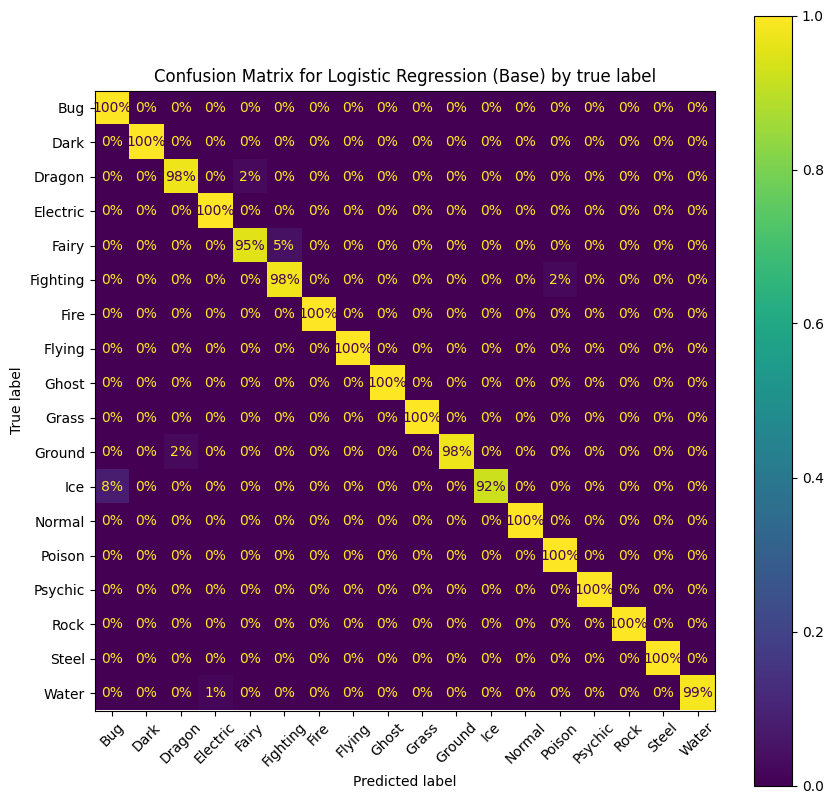

<Figure size 1000x1000 with 0 Axes>

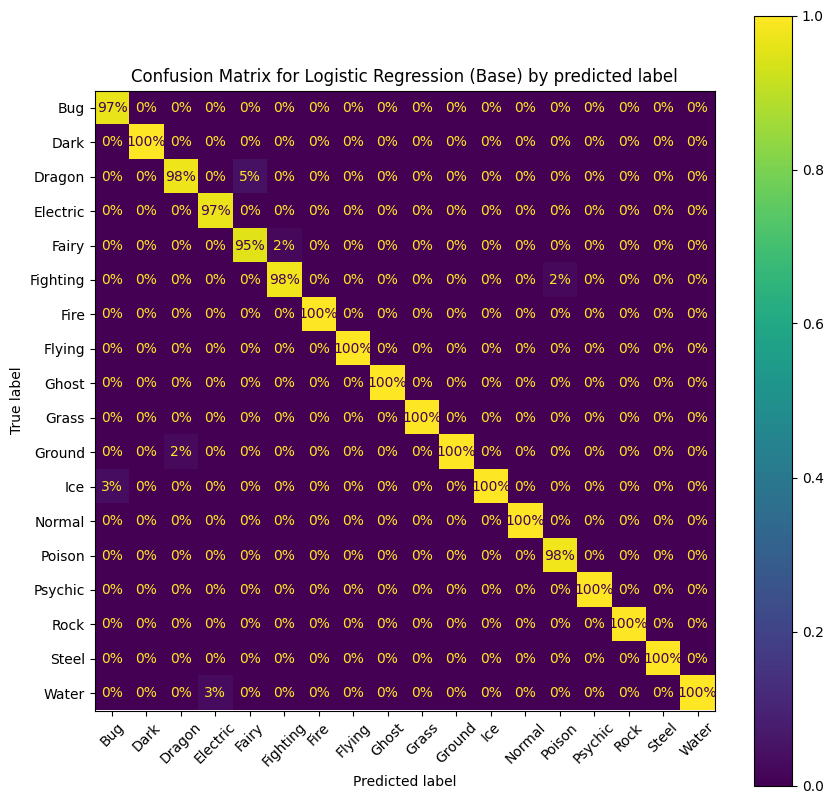

0.9914691943127962

In [3]:
outer_cv(
    tuner=SKBayesTuner(SKLogisticRegression()),
    search=space,
    name="Logistic Regression",
    duplicate=False,
    hard_mode=False,
)

### Hard

1  Cached result loaded from ../models/logistic_regression_hard/cv-1.mdl
1  Best configuration: OrderedDict([('C', 644.3459675825779), ('l1_ratio', 0.0), ('max_iter', 9001), ('multi_class', 'multinomial'), ('penalty', 'elasticnet'), ('random_state', 441), ('solver', 'saga'), ('warm_start', True)])
1  Accuracy: 0.3886255924170616
2  Cached result loaded from ../models/logistic_regression_hard/cv-2.mdl
2  Best configuration: OrderedDict([('C', 3.4755025999726676), ('l1_ratio', 1.0), ('max_iter', 9001), ('multi_class', 'multinomial'), ('penalty', 'elasticnet'), ('random_state', 441), ('solver', 'saga'), ('warm_start', True)])
2  Accuracy: 0.3886255924170616
3  Cached result loaded from ../models/logistic_regression_hard/cv-3.mdl
3  Best configuration: OrderedDict([('C', 4.973640388690109), ('l1_ratio', 1.0), ('max_iter', 9001), ('multi_class', 'multinomial'), ('penalty', 'elasticnet'), ('random_state', 441), ('solver', 'saga'), ('warm_start', True)])
3  Accuracy: 0.3459715639810427
4  Cac

<Figure size 1000x1000 with 0 Axes>

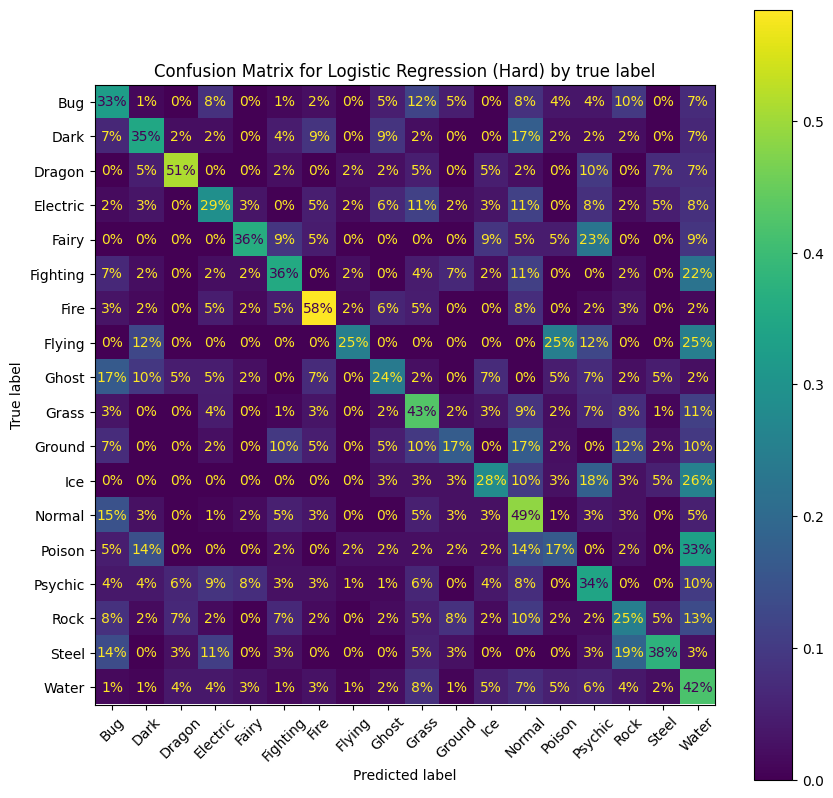

<Figure size 1000x1000 with 0 Axes>

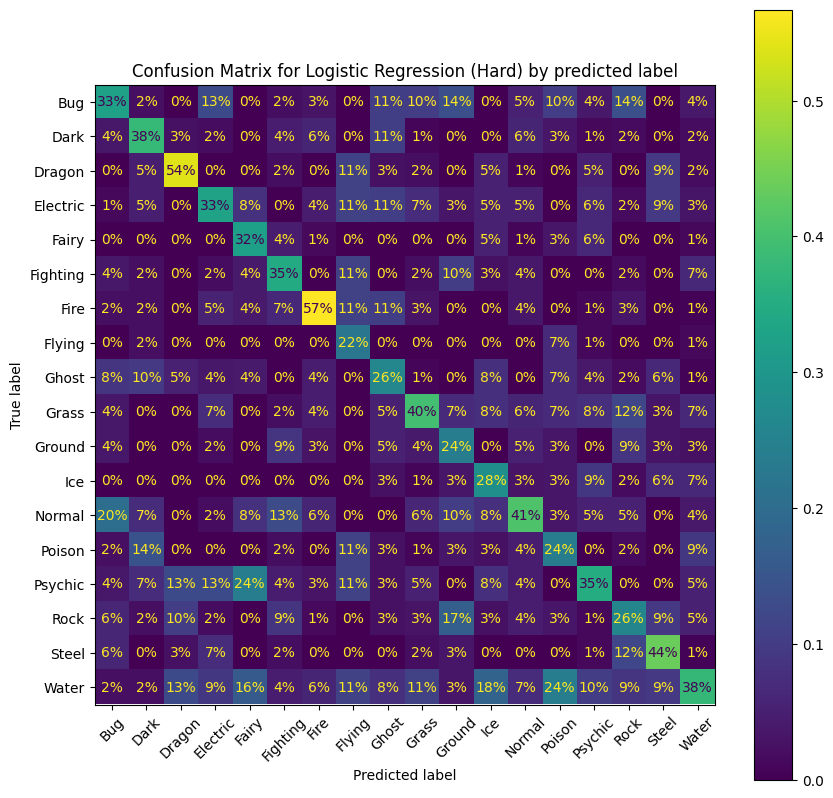

0.36903182125930944

In [4]:
outer_cv(
    tuner=SKBayesTuner(SKLogisticRegression()),
    search=space,
    name="Logistic Regression",
    duplicate=False,
    hard_mode=True,
)

### Duplication

1  Cached result loaded from ../models/logistic_regression_duplication/cv-1.mdl
1  Best configuration: OrderedDict([('C', 4.804573689258363), ('l1_ratio', 1.0), ('max_iter', 9001), ('multi_class', 'multinomial'), ('penalty', 'elasticnet'), ('random_state', 441), ('solver', 'saga'), ('warm_start', True)])
1  Accuracy: 0.985781990521327
2  Cached result loaded from ../models/logistic_regression_duplication/cv-2.mdl
2  Best configuration: OrderedDict([('C', 2.378061208097783), ('l1_ratio', 1.0), ('max_iter', 9001), ('multi_class', 'multinomial'), ('penalty', 'elasticnet'), ('random_state', 441), ('solver', 'saga'), ('warm_start', True)])
2  Accuracy: 0.976303317535545
3  Cached result loaded from ../models/logistic_regression_duplication/cv-3.mdl
3  Best configuration: OrderedDict([('C', 2.3462982868442794), ('l1_ratio', 0.8697960267314141), ('max_iter', 9001), ('multi_class', 'multinomial'), ('penalty', 'elasticnet'), ('random_state', 441), ('solver', 'saga'), ('warm_start', True)])
3  A

<Figure size 1000x1000 with 0 Axes>

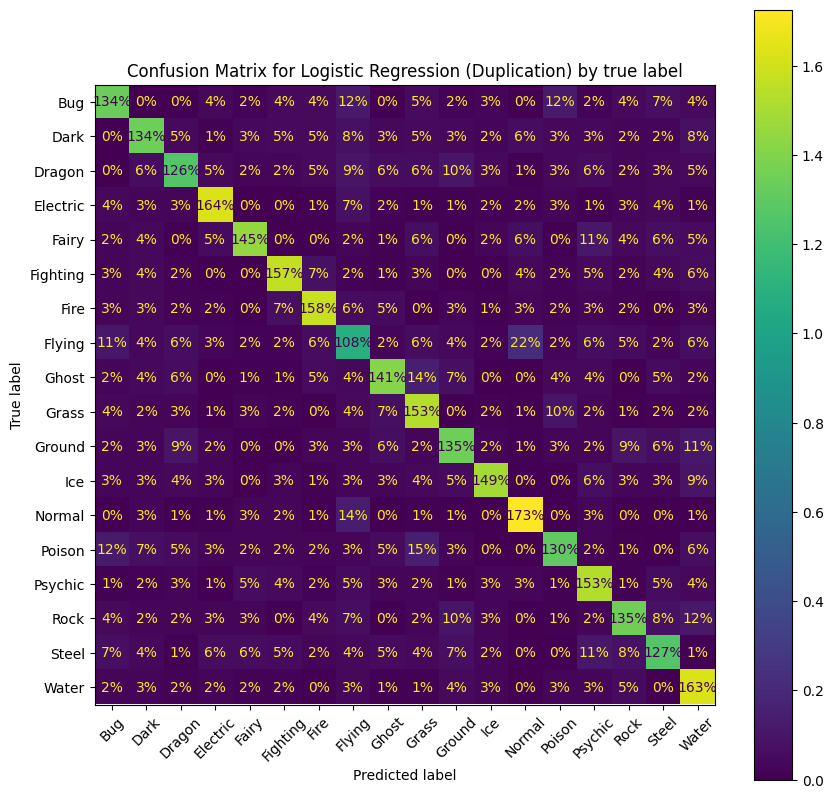

<Figure size 1000x1000 with 0 Axes>

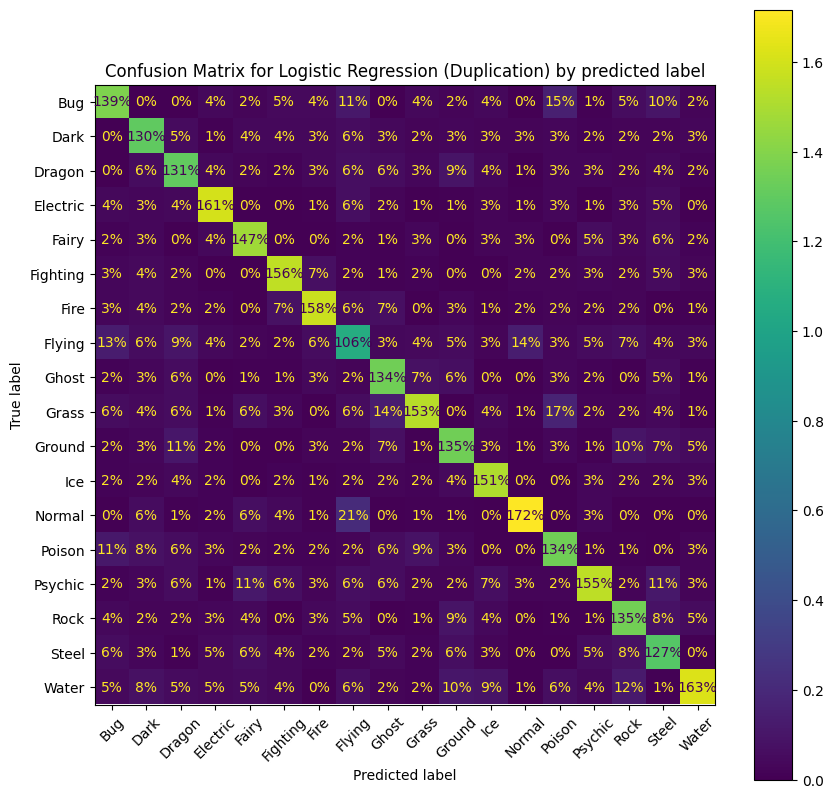

0.9781742270367862

In [5]:
outer_cv(
    tuner=SKBayesTuner(DuplicateSKLogisticRegression()),
    search=space,
    name="Logistic Regression",
    duplicate=True,
    hard_mode=False,
)

### Duplication, Hard

1  Cached result loaded from ../models/logistic_regression_duplication_hard/cv-1.mdl
1  Best configuration: OrderedDict([('C', 25.009327685975965), ('l1_ratio', 1.0), ('max_iter', 9001), ('multi_class', 'multinomial'), ('penalty', 'elasticnet'), ('random_state', 441), ('solver', 'saga'), ('warm_start', True)])
1  Accuracy: 0.3791469194312796
2  Cached result loaded from ../models/logistic_regression_duplication_hard/cv-2.mdl
2  Best configuration: OrderedDict([('C', 6.108943937149807), ('l1_ratio', 0.9884316522501975), ('max_iter', 9001), ('multi_class', 'multinomial'), ('penalty', 'elasticnet'), ('random_state', 441), ('solver', 'saga'), ('warm_start', True)])
2  Accuracy: 0.3222748815165877
3  Cached result loaded from ../models/logistic_regression_duplication_hard/cv-3.mdl
3  Best configuration: OrderedDict([('C', 3.641496758321364), ('l1_ratio', 1.0), ('max_iter', 9001), ('multi_class', 'multinomial'), ('penalty', 'elasticnet'), ('random_state', 441), ('solver', 'saga'), ('warm_sta

<Figure size 1000x1000 with 0 Axes>

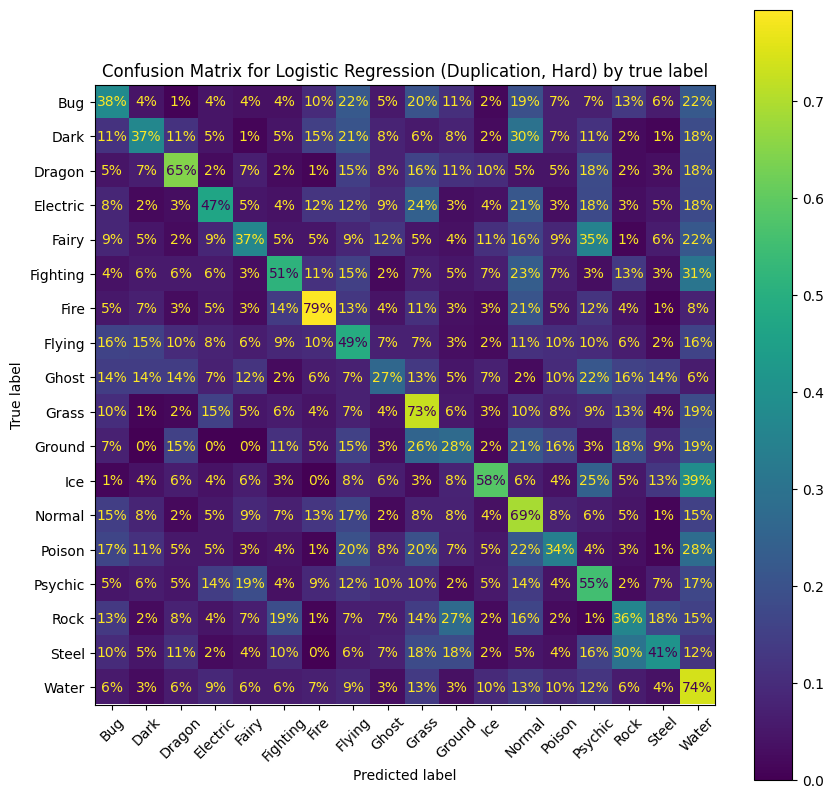

<Figure size 1000x1000 with 0 Axes>

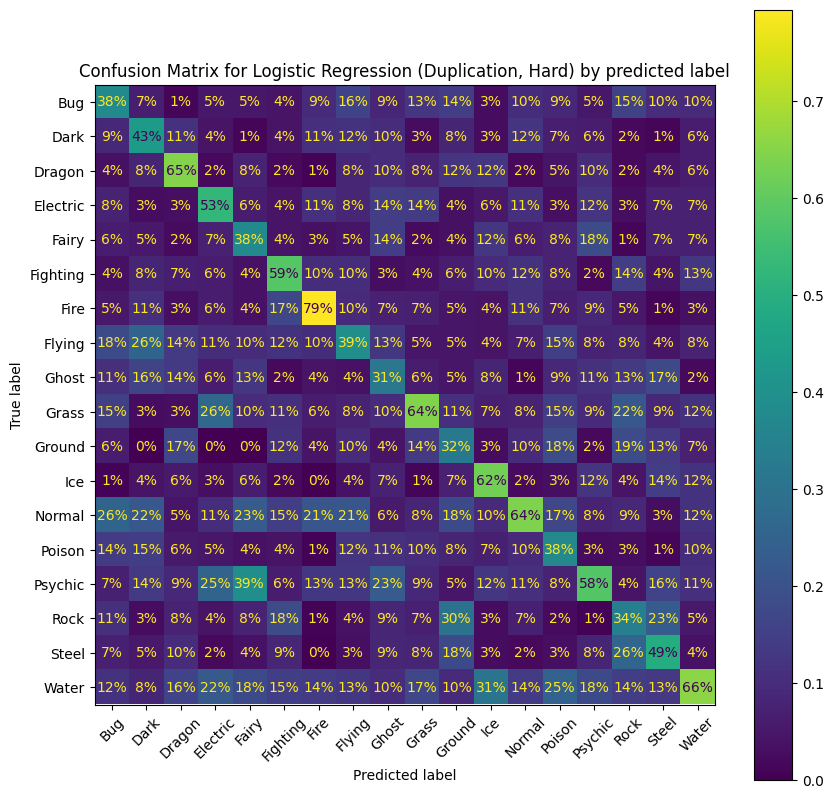

0.35626043782441885

In [6]:
outer_cv(
    tuner=SKBayesTuner(DuplicateSKLogisticRegression()),
    search=space,
    name="Logistic Regression",
    duplicate=True,
    hard_mode=True,
)